In [2]:
from scipy.special import erf  
import numpy as np
import matplotlib.pyplot as plt
from fipy import Variable, FaceVariable, CellVariable, Grid1D, ExplicitDiffusionTerm, TransientTerm, DiffusionTerm, Viewer
from IPython.display import Latex

## Solucion numerica del problema de difusión
### Conducción no estacionaria en tranferencia de calor

$$\frac{\partial T}{\partial t} = D \nabla^2 T.$$

### Caso 1: Problema sólido sometido a una condición inicial de Temperatura.

In [3]:
### Geometría
nx = 50
Lx = 30e-2
dx = Lx/nx
T0 = 10.
T1 = 20.
#Definicion de una malla
mesh = Grid1D(Lx=Lx, dx = dx)
#acceso a los nodos de la malla
x = mesh.cellCenters[0]

#Definición de la variable solución del problema: T
T = CellVariable(name="Temperatura",mesh=mesh, value=T0)

#Valor Inicial de la solución
T.setValue(T0)

#Parámetro Físico de la ecuacion: Difusión a
a = 0.27e-5  #ladrillo

# Condiciones de Borde Dirichlet 0 y 1
valueLeft = T1
valueRight = T0
# Condicion de Borde Neuman en 0
GradValueLeft = -1  #estos es qs/lambda

# Aplicacion sobre la variable solucion del problema
T.constrain(valueRight, mesh.facesRight)
T.constrain(valueLeft, mesh.facesLeft)
#T.faceGrad.constrain(-1,mesh.facesLeft)

El incremento de tiempo máximo admisible se estima $\Delta t \le \Delta x^2 / (2 a)$.
Una fracción de ese valor asegura que el cálculo numérico sea estable.



In [9]:
# Definicion de la variable tiempo
delta_tiempo = 0.5 * dx**2 / (2 * a)

# Horizonte de tiempo "corto"
Fourier = 0.035  # t *a / x
t_final = Fourier * Lx/a
pasos = int(t_final / delta_tiempo)

tiempo = np.linspace(0,t_final,pasos)

# Definición de la ecuación a resolver: Ecuacion de Fourier
# Se trata de un termino transitorio y un termino difusivo
# Se define un objeto ecuacion:    eqX
eqX = TransientTerm() == ExplicitDiffusionTerm(coeff=a)  

#Opcional para este problema introductorio, comparación con el resultado analítico
T_Analytical_1 = CellVariable(name="Temperatura analítica", mesh=mesh)
T_Analytical_2 = CellVariable(name="Temperatura analítica", mesh=mesh)
# Evaluamos en el tiempo final
T_Analytical_1.setValue(T0+(T1-T0)*(1 - erf(x / (2 * np.sqrt(a * t_final))))) 
T_Analytical_2.setValue(T0+(T1-T0)*(1 - erf(x / (2 * np.sqrt(a * t_final/2))))) 
#T_Analytical.setValue(0 - GradValueLeft *( np.sqrt(4*a*t_final/np.pi)*np.exp(-x**2/(4*a*t_final))-x*(1-erf(x/(4*a*t_final)**.5) ) ) )

In [10]:
display(Latex(r'$\Delta t$=%.2g s'%delta_tiempo))
display(Latex(r'$T_{final}$=%.1f s'%t_final))
display(Latex(r'Pasos de tiempo: %0d'%tiempo.shape[0]))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [11]:
# Preparación de la salida gráfica. Se visualizará la solución y la referencia analítica
#viewer = Viewer(vars=(T,T_Analytical) )
perfil_temp = np.tile(np.zeros_like(T.value),(pasos,1))
# Resolución de la ecuación diferencial para cada paso temporal 
T.setValue(T0)
for i,tiempo_i in enumerate(tiempo):
    perfil_temp[i] = T.value
    eqX.solve(var=T,dt=delta_tiempo)
    #if __name__ == '__main__':
       # viewer.plot()#('1Dtransient_%0d.png'%step)
    

<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_332943/888768046.py:11: SyntaxWarning: invalid escape sequence '\c'
  ax0.set_ylabel('T [$^\circ$C]');


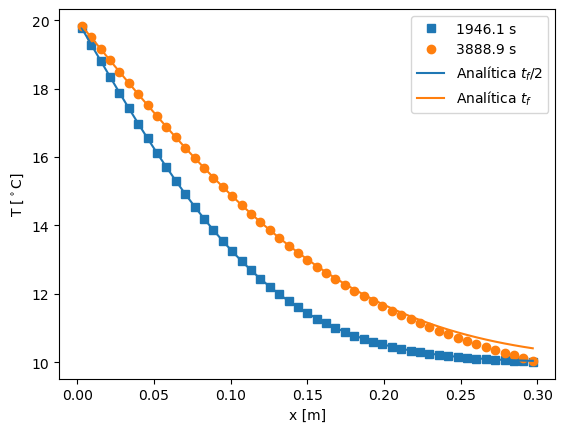

In [12]:
fig0,ax0  = plt.subplots()
#ax0.plot(x.value,perfil_temp[0])
i = np.abs(tiempo-t_final/2).argmin()
lin1, = ax0.plot(x.value,perfil_temp[i],label='%.1f s'%tiempo[i],marker='s',linestyle='')
lin2, = ax0.plot(x.value,perfil_temp[-1],label='%.1f s'%t_final,marker='o',linestyle = '')

ax0.plot(x.value,T_Analytical_2.value,label= r'Analítica $t_f/2$',color = lin1.get_color())
ax0.plot(x.value,T_Analytical_1.value,label= r'Analítica $t_f$',color = lin2.get_color())
ax0.legend()
ax0.set_xlabel('x [m]')
ax0.set_ylabel('T [$^\circ$C]');

### Caso 2: Problema sólido sometido a un flujo de calor constante.

In [13]:
### Geometría
nx = 50
Lx = 30e-2
dx = Lx/nx
T0 = 10.
T1 = 20.
#Definicion de una malla
mesh = Grid1D(Lx=Lx, dx = dx)
#acceso a los nodos de la malla
x = mesh.cellCenters[0]

#Definición de la variable solución del problema: T
T = CellVariable(name="Temperatura",mesh=mesh, value=T0)

#Valor Inicial de la solución
T.setValue(T0)

#Parámetro Físico de la ecuacion: Difusión a
a = 0.27e-5  #ladrillo

# Condiciones de Borde Dirichlet 0 y 1
valueRight = T0
# Condicion de Borde Neuman en 0
GradValueLeft = -20  #estos es qs/lambda

# Aplicacion sobre la variable solucion del problema
T.constrain(valueRight, mesh.facesRight)
T.faceGrad.constrain(GradValueLeft,mesh.facesLeft)

In [15]:
# Definicion de la variable tiempo
delta_tiempo = 0.5 * dx**2 / (2 * a)

# Horizonte de tiempo "corto"
Fourier = 0.035  # t *a / x
t_final = Fourier * Lx/a
pasos = int(t_final / delta_tiempo)

tiempo = np.linspace(0,t_final,pasos)

# Definición de la ecuación a resolver: Ecuacion de Fourier
# Se trata de un termino transitorio y un termino difusivo
# Se define un objeto ecuacion:    eqX
eqX = TransientTerm() == ExplicitDiffusionTerm(coeff=a)  

#Opcional para este problema introductorio, comparación con el resultado analítico
T_Analytical = CellVariable(name="Temperatura analítica", mesh=mesh)
# Evaluamos en el tiempo final
T_Analytical.setValue(T0 - GradValueLeft *( np.sqrt(4*a*t_final/np.pi)*np.exp(-x**2/(4*a*t_final))-x*(1-erf(x/(4*a*t_final)**.5) ) ) )

In [16]:
# Preparación de la salida gráfica. Se visualizará la solución y la referencia analítica
#viewer = Viewer(vars=(T,T_Analytical) )
perfil_temp2 = np.tile(np.zeros_like(T.value),(pasos,1))
# Resolución de la ecuación diferencial para cada paso temporal 
T.setValue(T0)
for i,tiempo_i in enumerate(tiempo):
    perfil_temp2[i] = T.value
    eqX.solve(var=T,dt=delta_tiempo)

    

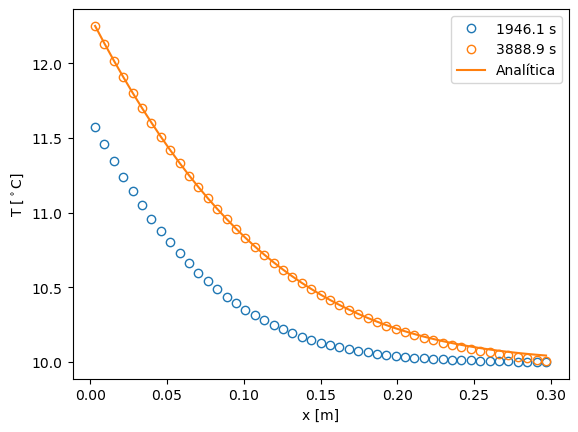

In [18]:
fig1,ax1  = plt.subplots()

i = np.abs(tiempo-t_final/2).argmin()
lin1, = ax1.plot(x.value,perfil_temp2[i],label='%.1f s'%tiempo[i],marker='o',linestyle='',markerfacecolor='None')
lin2, = ax1.plot(x.value,perfil_temp2[-1],label='%.1f s'%t_final,marker='o',linestyle='',markerfacecolor='None')

ax1.plot(x.value,T_Analytical.value,label= r'Analítica',color = lin2.get_color())

ax1.legend()
ax1.set_xlabel('x [m]')
ax1.set_ylabel(r'T [$^\circ$C]');